In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

Text(0, 0.5, 'Acceleration (m/s^2)')

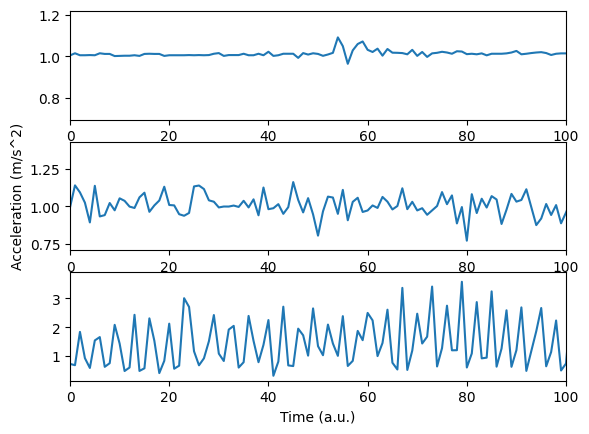

In [6]:
static = np.sqrt(np.sum(np.load("static.npy")[1:,:]**2,axis=0))
normal = np.sqrt(np.sum(np.load("normal.npy")[1:,:]**2,axis=0))
tremor = np.sqrt(np.sum(np.load("tremor.npy")[1:,:]**2,axis=0))

fig, axs = plt.subplots(3, 1)

axs[0].plot(static.T)
axs[2].plot(tremor.T)
axs[1].plot(normal.T)
axs[2].set_xlabel("Time (a.u.)")
axs[0].set_xlim(0,100)
axs[1].set_xlim(0,100)
axs[2].set_xlim(0,100)
axs[1].set_ylabel("Acceleration (m/s^2)")

In [45]:
def plot_fft(data, num_samples, sample_rate):
    fft_values = fft(data)
    frequencies = fftfreq(num_samples, d=1/sample_rate)
    positive_freqs = frequencies[:num_samples // 2]
    positive_fft_values = np.abs(fft_values[:num_samples // 2])

    return positive_freqs, positive_fft_values


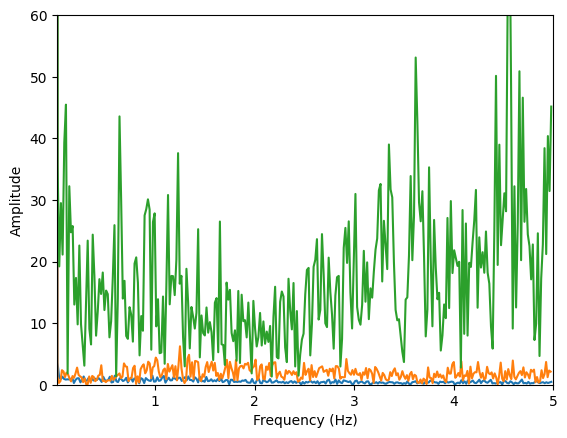

In [46]:
plt.figure()
positive_freqs, positive_fft_values = plot_fft(static,len(static),10)
plt.plot(positive_freqs, positive_fft_values)
positive_freqs, positive_fft_values = plot_fft(normal,len(normal),10)
plt.plot(positive_freqs, positive_fft_values)
positive_freqs, positive_fft_values = plot_fft(tremor,len(tremor),10)
plt.plot(positive_freqs, positive_fft_values)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0.01,5)
plt.ylim(0,60)
plt.show()